Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [2]:
df = pd.read_csv("Dataset\Karachi Stock Exchange Pakistan.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\K'
<>:1: SyntaxWarning: invalid escape sequence '\K'
C:\Users\3 Stars Laptop\AppData\Local\Temp\ipykernel_5640\2446501960.py:1: SyntaxWarning: invalid escape sequence '\K'
  df = pd.read_csv("Dataset\Karachi Stock Exchange Pakistan.csv")


,Date,Open,High,Low,Close,Change,Volume
0,23-Feb-21,"31,722.16","31,800.90","31,597.31","31,626.19",-21.38,"718,191,025"
1,22-Feb-21,"31,874.78","31,958.58","31,612.55","31,647.57",-203.61,"721,952,658"
2,19-Feb-21,"31,748.75","31,904.30","31,749.43","31,851.18",91.36,"694,795,084"
3,18-Feb-21,"32,049.85","32,104.67","31,745.72","31,759.82",-288.86,"577,837,595"
4,17-Feb-21,"32,166.21","32,390.77","32,044.01","32,048.68",-93.15,"701,658,181"


Preparing the Dataset

In [3]:
df.dtypes

Date      object
Open      object
High      object
Low       object
Close     object
Change    object
Volume    object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3221 non-null   object
 1   Open    3221 non-null   object
 2   High    3221 non-null   object
 3   Low     3221 non-null   object
 4   Close   3221 non-null   object
 5   Change  3221 non-null   object
 6   Volume  3221 non-null   object
dtypes: object(7)
memory usage: 176.3+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\3 Stars Laptop\AppData\Local\Temp\ipykernel_5640\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
df['Open'] =  df['Open'].replace(',', '', regex=True).astype(float)
df['High'] = df['High'].replace(',', '', regex=True).astype(float)
df['Low'] = df['Low'].replace(',', '', regex=True).astype(float)
df['Close'] = df['Close'].replace(',', '', regex=True).astype(float)
df['Change'] = df['Change'].replace(',', '', regex=True).astype(float)
df['Volume'] = df['Volume'].replace(',', '', regex=True).astype(float)

In [7]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Change           float64
Volume           float64
dtype: object

Exploratory Data Analysis (EDA)

In [8]:
df.describe()

,Date,Open,High,Low,Close,Change,Volume
count,3221,3221.000000,3221.000000,3221.000000,3221.000000,3221.000000,3.221000e+03
mean,2014-08-25 10:01:18.236572416,18806.389208,18913.961723,18694.557457,18801.652980,6.662738,2.006365e+08
min,2008-02-22 00:00:00,3634.560000,3742.310000,3623.350000,3647.100000,-8060.960000,-1.525267e+08
25%,2011-05-24 00:00:00,8418.150000,8479.860000,8348.880000,8426.350000,-68.460000,1.120844e+08
50%,2014-08-27 00:00:00,21777.350000,21885.330000,21640.080000,21771.630000,6.330000,1.702730e+08
75%,2017-11-23 00:00:00,27911.000000,28108.020000,27656.070000,27895.150000,95.560000,2.543143e+08
max,2021-02-23 00:00:00,36317.920000,36389.500000,36132.760000,36234.200000,7957.090000,1.124724e+09
std,NaN,9556.736989,9599.905455,9502.488358,9550.963841,288.333717,1.348805e+08


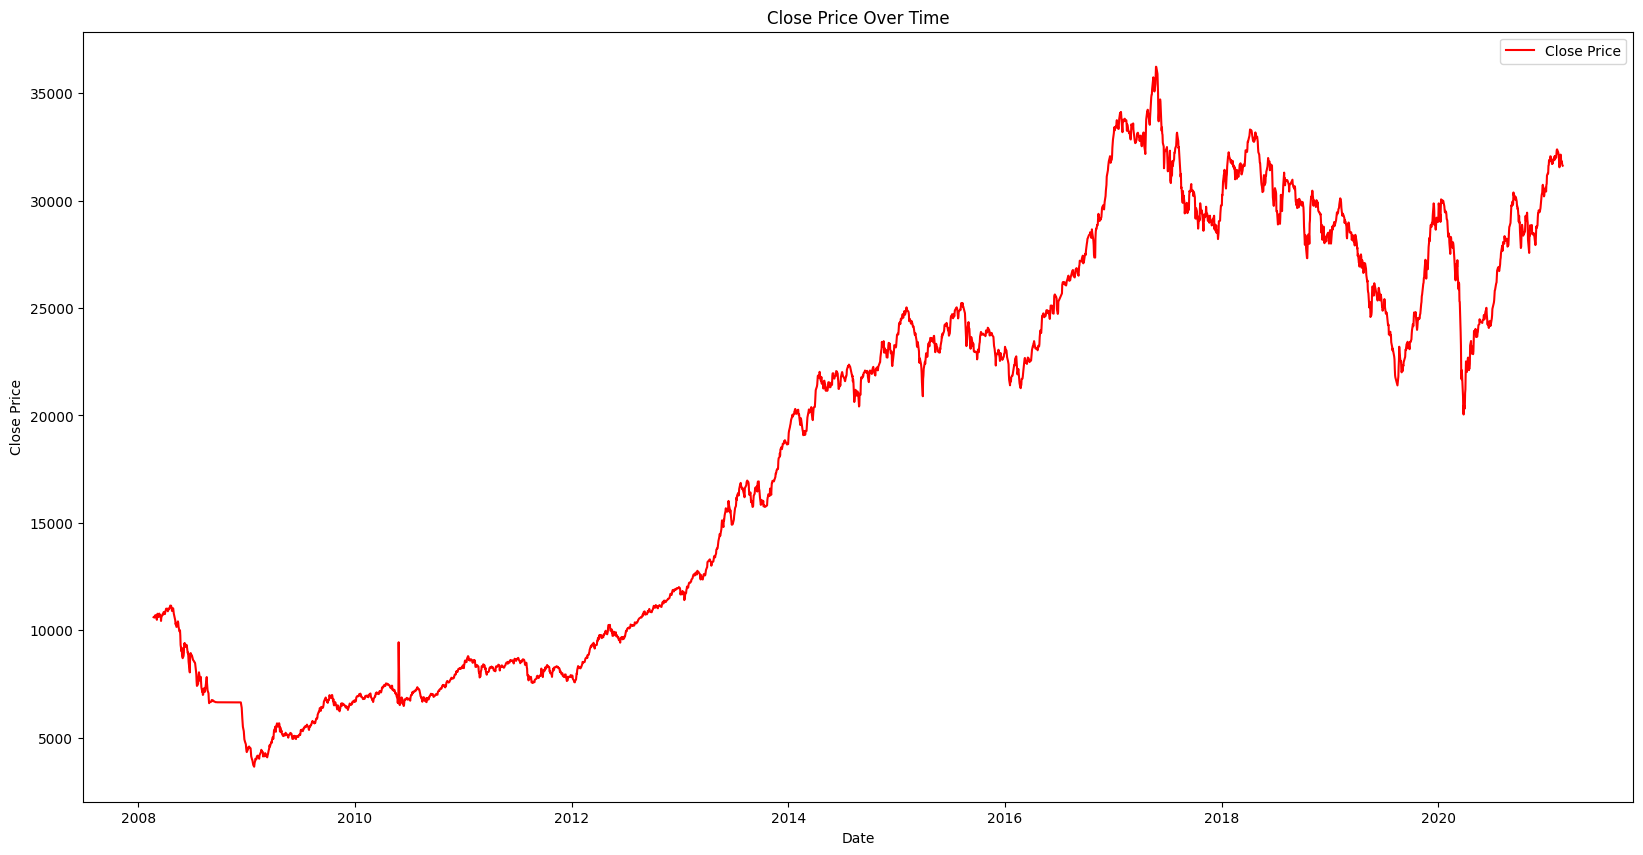

In [9]:
# Time Series Analysis

plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Close'], label="Close Price", color="red")
plt.title("Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

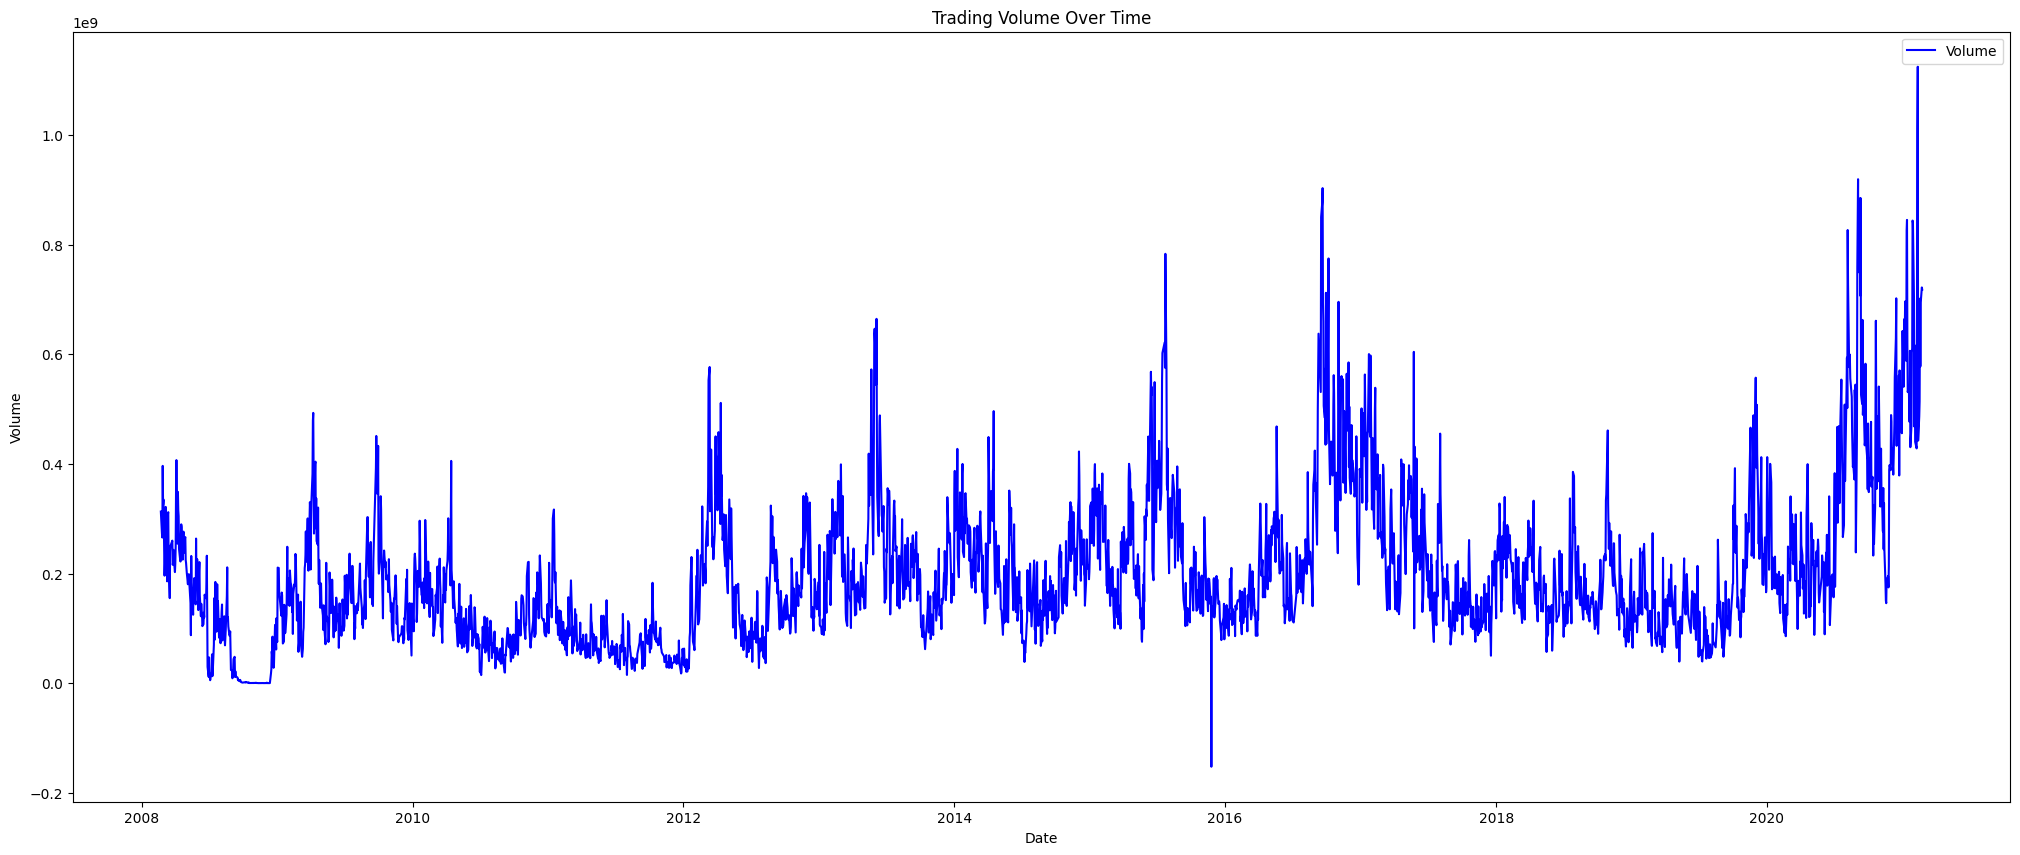

In [10]:
plt.figure(figsize=(25, 10))
plt.plot(df['Date'], df['Volume'], label="Volume", color="blue")
plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Change'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

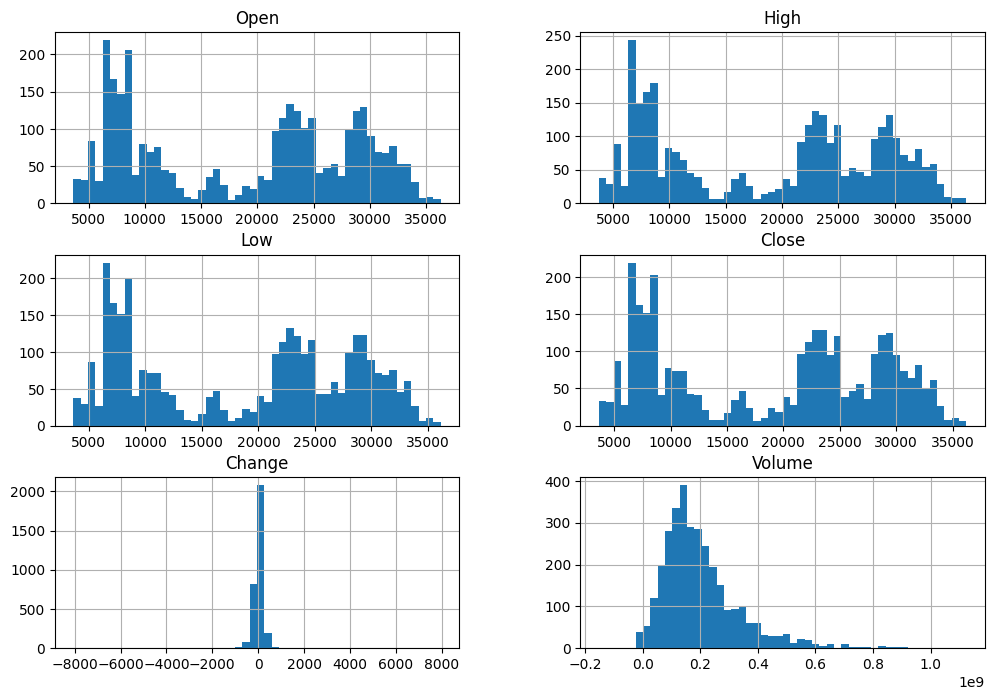

In [11]:
# Distribution Analysis

df_numeric = df.drop(columns=['Date'])
df_numeric.hist(bins=50, figsize=(12, 8))

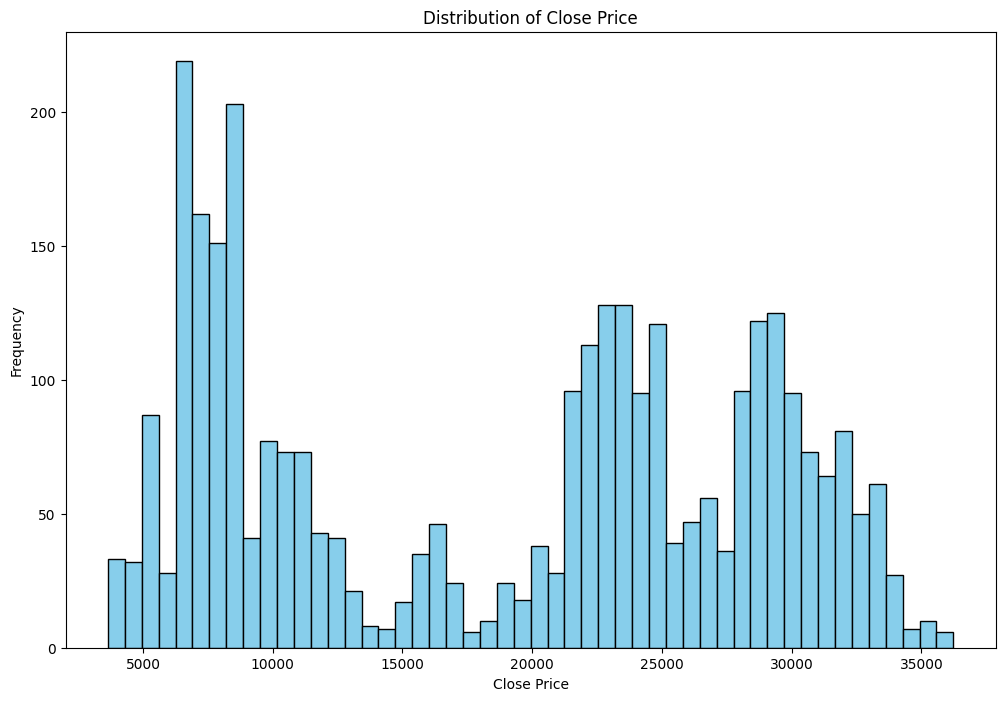

In [12]:
plt.figure(figsize=(12, 8))
plt.hist(df['Close'], bins=50, color= "skyblue", edgecolor= "black")
plt.title("Distribution of Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()

Correlation Analysis

In [13]:
correlation_matrix = df.corr()
print(correlation_matrix)

            Date      Open      High       Low     Close    Change    Volume
Date    1.000000  0.911607  0.912197  0.911230  0.911787  0.008685  0.384619
Open    0.911607  1.000000  0.999933  0.999891  0.999800 -0.000276  0.428193
High    0.912197  0.999933  1.000000  0.999889  0.999901  0.005177  0.430356
Low     0.911230  0.999891  0.999889  1.000000  0.999914  0.007641  0.429827
Close   0.911787  0.999800  0.999901  0.999914  1.000000  0.013363  0.430720
Change  0.008685 -0.000276  0.005177  0.007641  0.013363  1.000000  0.125037
Volume  0.384619  0.428193  0.430356  0.429827  0.430720  0.125037  1.000000


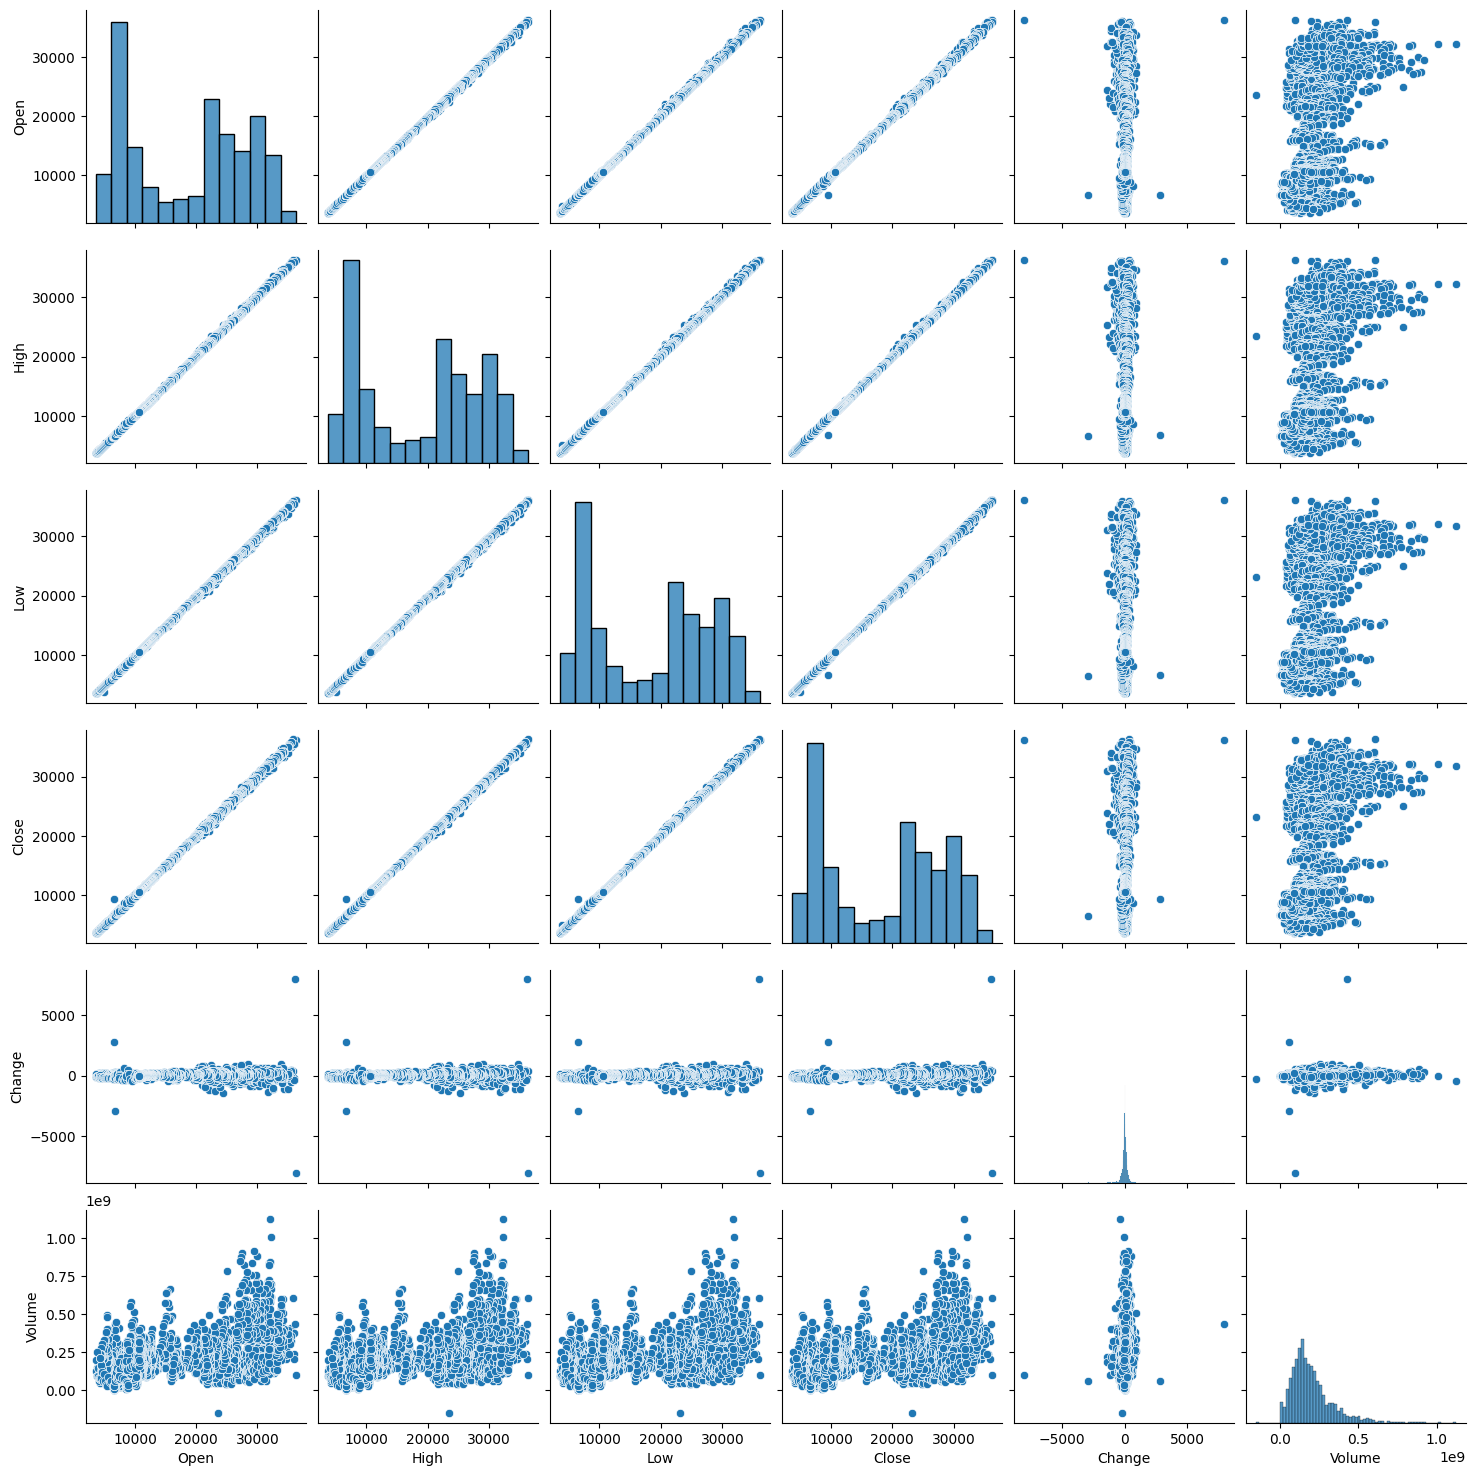

In [14]:
sns.pairplot(df)

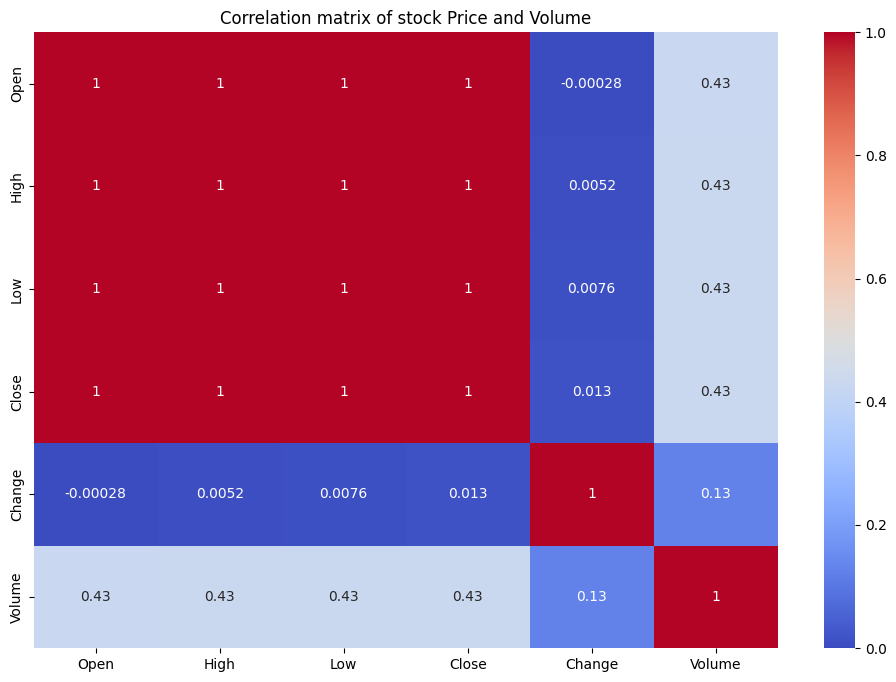

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Change', 'Volume']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation matrix of stock Price and Volume")
plt.show()

Moving Average Analysis

In [16]:
short_window = 10
long_window = 50

df['Short_SMA'] = df['Close'].rolling(window=short_window).mean()
df['Long_SMA'] = df['Close'].rolling(window=long_window).mean()

df['Short_EMA'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['Long_EMA'] = df['Close'].ewm(span=long_window, adjust=False).mean()

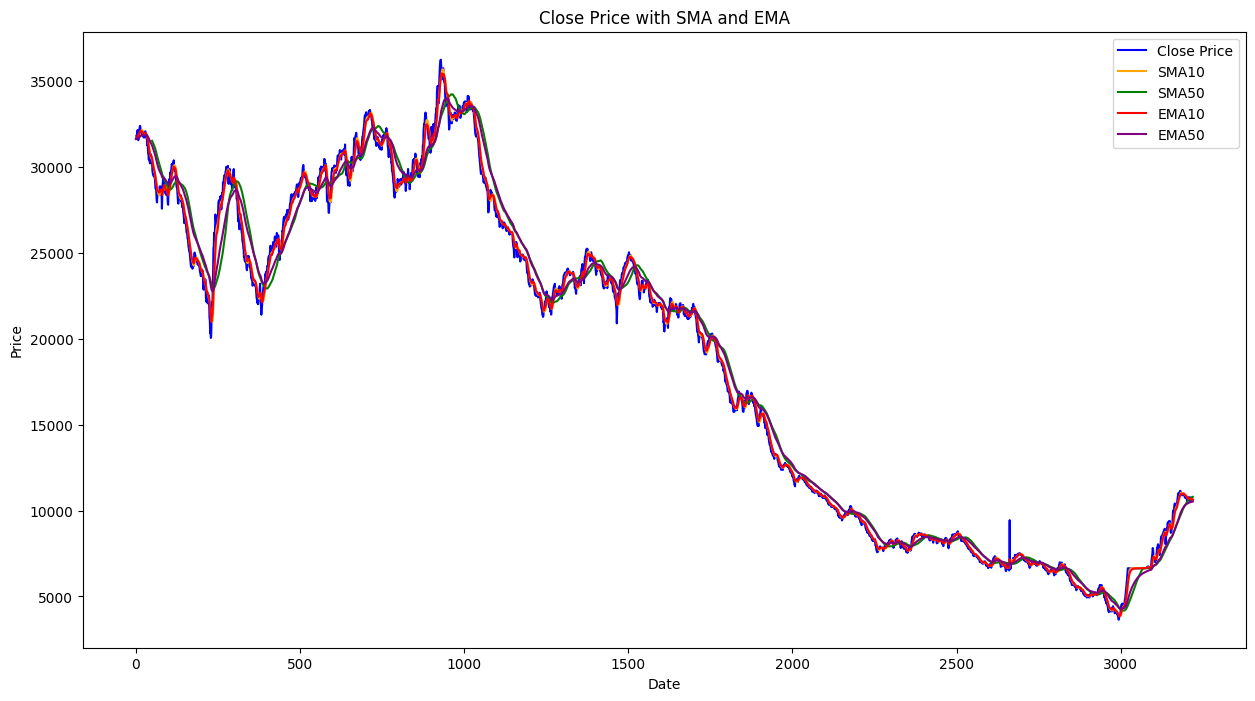

In [17]:
# Ploting Close Price with SMA and EMA

plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label="Close Price", color="blue")
plt.plot(df['Short_SMA'], label=f'SMA{short_window}', color="orange")
plt.plot(df['Long_SMA'], label=f'SMA{long_window}', color="green")
plt.plot(df['Short_EMA'], label=f'EMA{short_window}', color="red")
plt.plot(df['Long_EMA'], label=f'EMA{long_window}', color="purple")


plt.title("Close Price with SMA and EMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

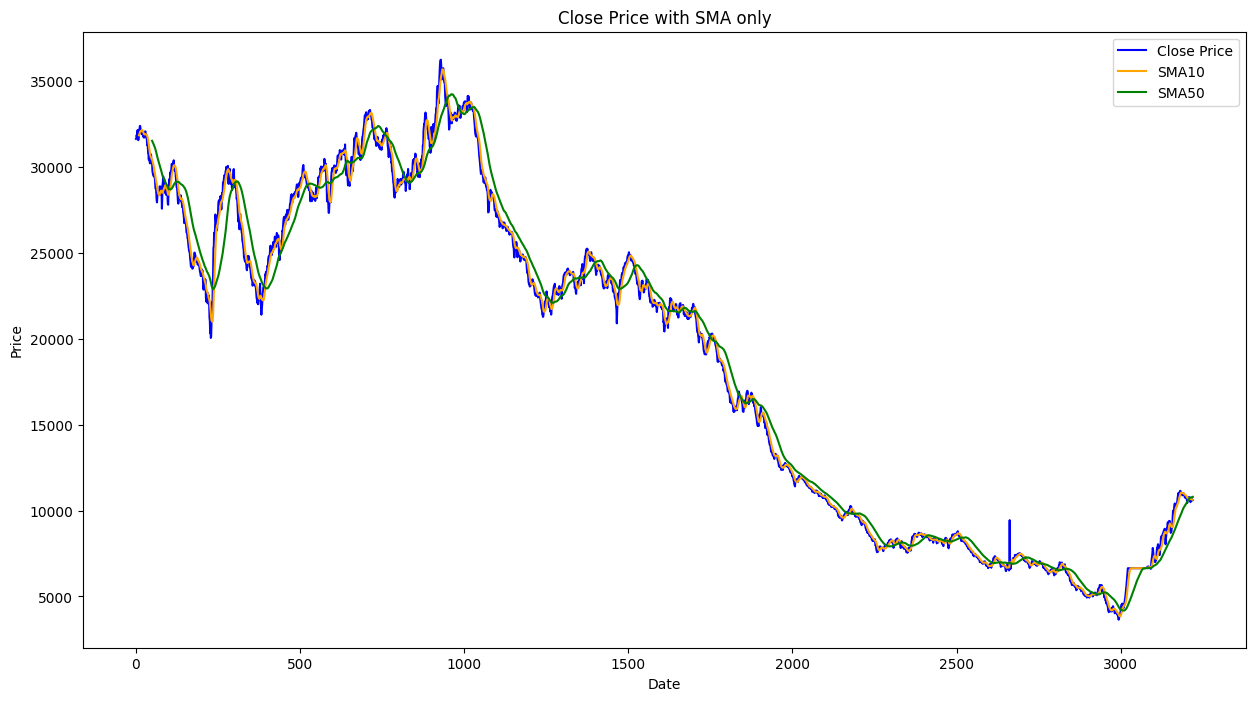

In [18]:
# Ploting Close Price with SMA only

plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label="Close Price", color="blue")
plt.plot(df['Short_SMA'], label=f'SMA{short_window}', color="orange")
plt.plot(df['Long_SMA'], label=f'SMA{long_window}', color="green")

plt.title("Close Price with SMA only")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

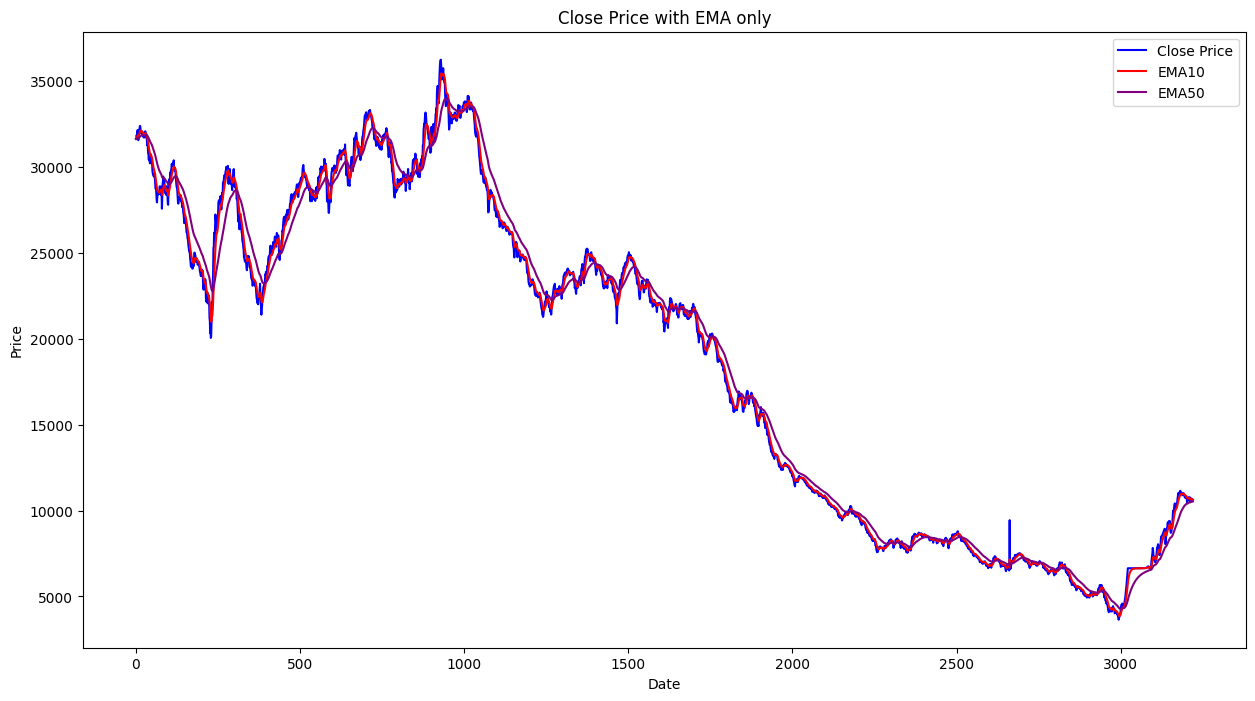

In [19]:
# Ploting Close Price with EMA only

plt.figure(figsize=(15, 8))
plt.plot(df['Close'], label="Close Price", color="blue")
plt.plot(df['Short_EMA'], label=f'EMA{short_window}', color="red")
plt.plot(df['Long_EMA'], label=f'EMA{long_window}', color="purple")

plt.title("Close Price with EMA only")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

Relative Strenght Index (RSI)

In [20]:
# calculating the Gain and Loss

df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Change'].apply(lambda x: -x if x < 0 else 0)

# calculating the average Gain and the average Loss

window_lenght = 14
df['Avg_Gain'] = df['Gain'].rolling(window=window_lenght, min_periods=1).mean()
df['Avg_Loss'] = df['Loss'].rolling(window=window_lenght, min_periods=1).mean()

# Calculating the RS and the RSI

df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

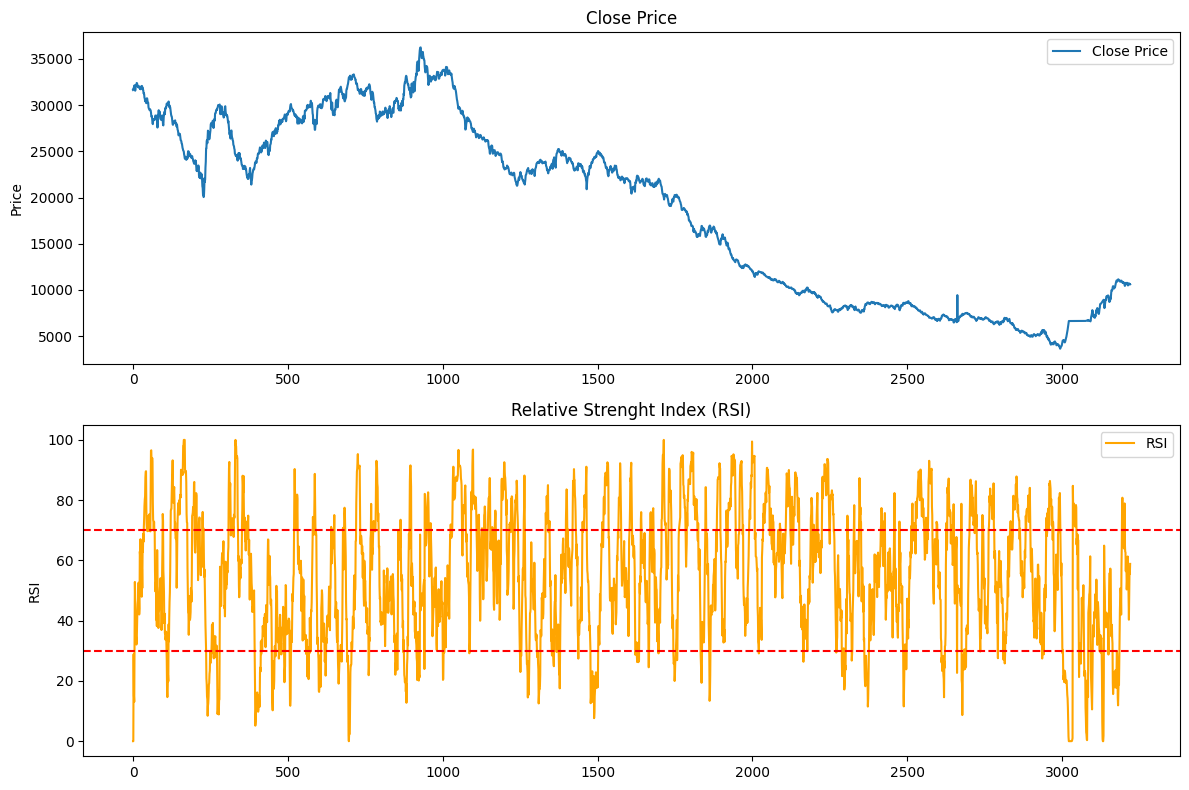

In [21]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting the subplot of Close price
axis1.plot(df['Close'], label = "Close Price")
axis1.set_title('Close Price')
axis1.set_ylabel("Price")
axis1.legend()

# Plotting the subplot of RSI

axis2.plot(df['RSI'], label='RSI', color='orange')
axis2.axhline(70, color='red', linestyle='--')
axis2.axhline(30, color='red', linestyle='--')
axis2.set_title("Relative Strenght Index (RSI)")
axis2.set_ylabel("RSI")
axis2.legend()

plt.tight_layout()
plt.show()

Rolling Standard Deviation

In [22]:
window_lenght = 14
df['Rolling_Std_Dev'] = df['Close'].rolling(window=window_lenght).std()

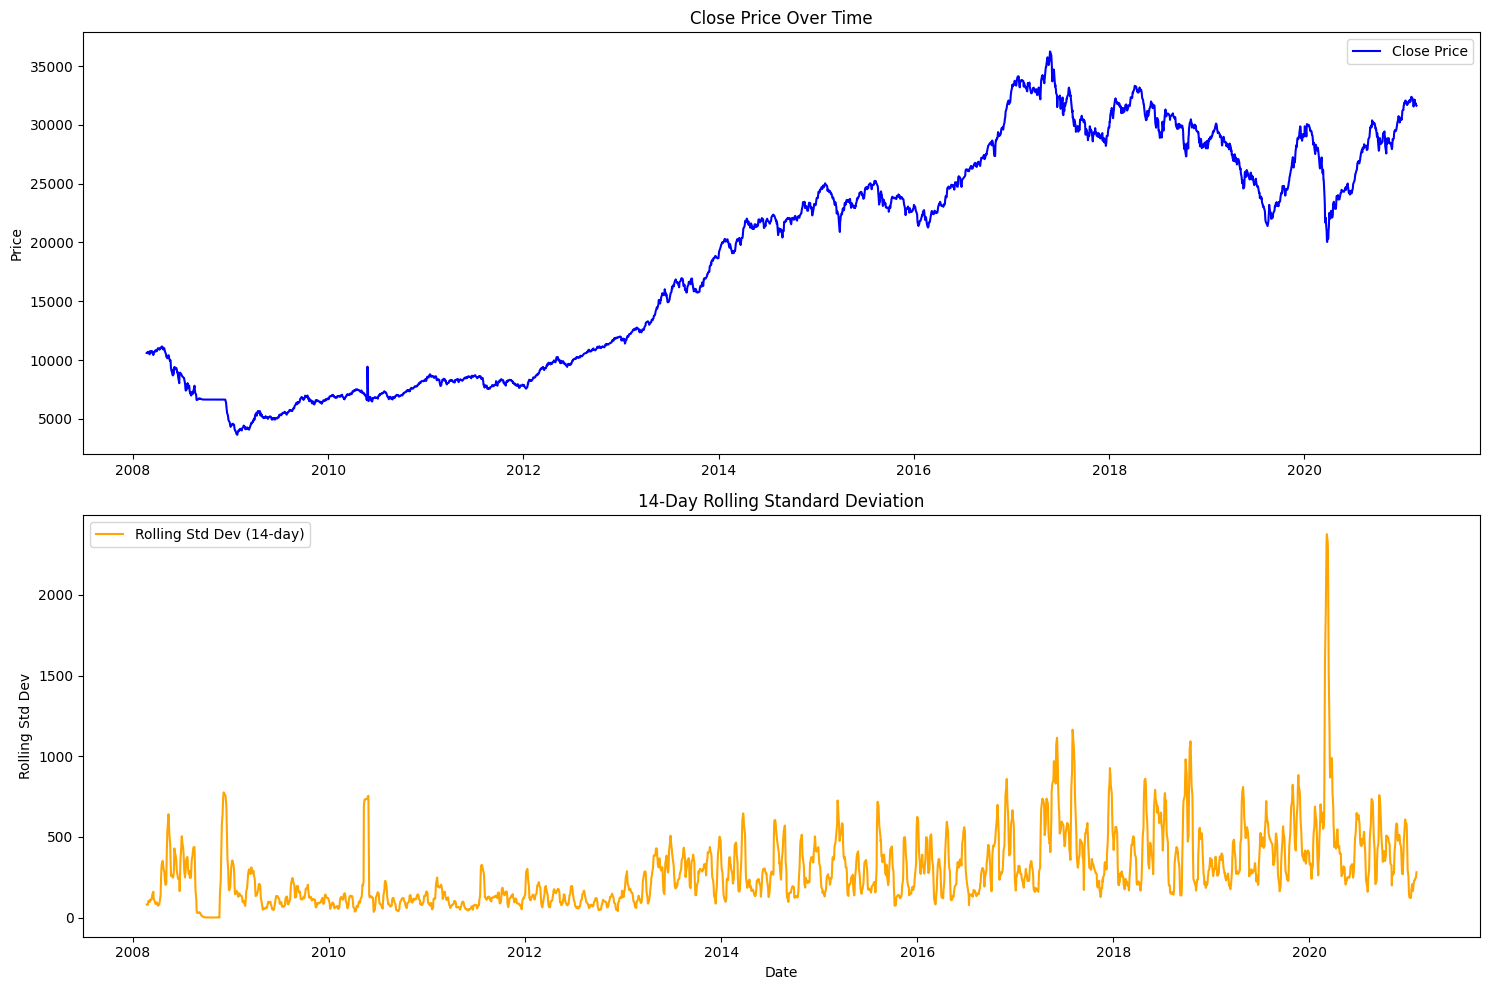

In [23]:
# Plot Close Price and Rolling Standard Deviation

fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot Close Price

axis1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
axis1.set_title('Close Price Over Time')
axis1.set_ylabel('Price')
axis1.legend()

# Plot Rolling Standard Deviation

axis2.plot(df['Date'], df['Rolling_Std_Dev'], color='orange', label=f'Rolling Std Dev ({14}-day)')
axis2.set_title(f'{14}-Day Rolling Standard Deviation')
axis2.set_ylabel('Rolling Std Dev')
axis2.set_xlabel('Date')
axis2.legend()

plt.tight_layout()
plt.show()

Average True Range (ATR)

In [24]:
# Calculating the TR

df['High-Low'] = df['High'] - df['Low']
df['High-PrevClose'] = abs(df['High'] - df['Close'].shift(1))
df['Low-PrevClose'] = abs(df['Low'] - df['Close'].shift(1))
df['TR'] = df[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

# Calculating the ATR

window_lenght = 14
df['ATR'] = df['TR'].rolling(window=window_lenght).mean()

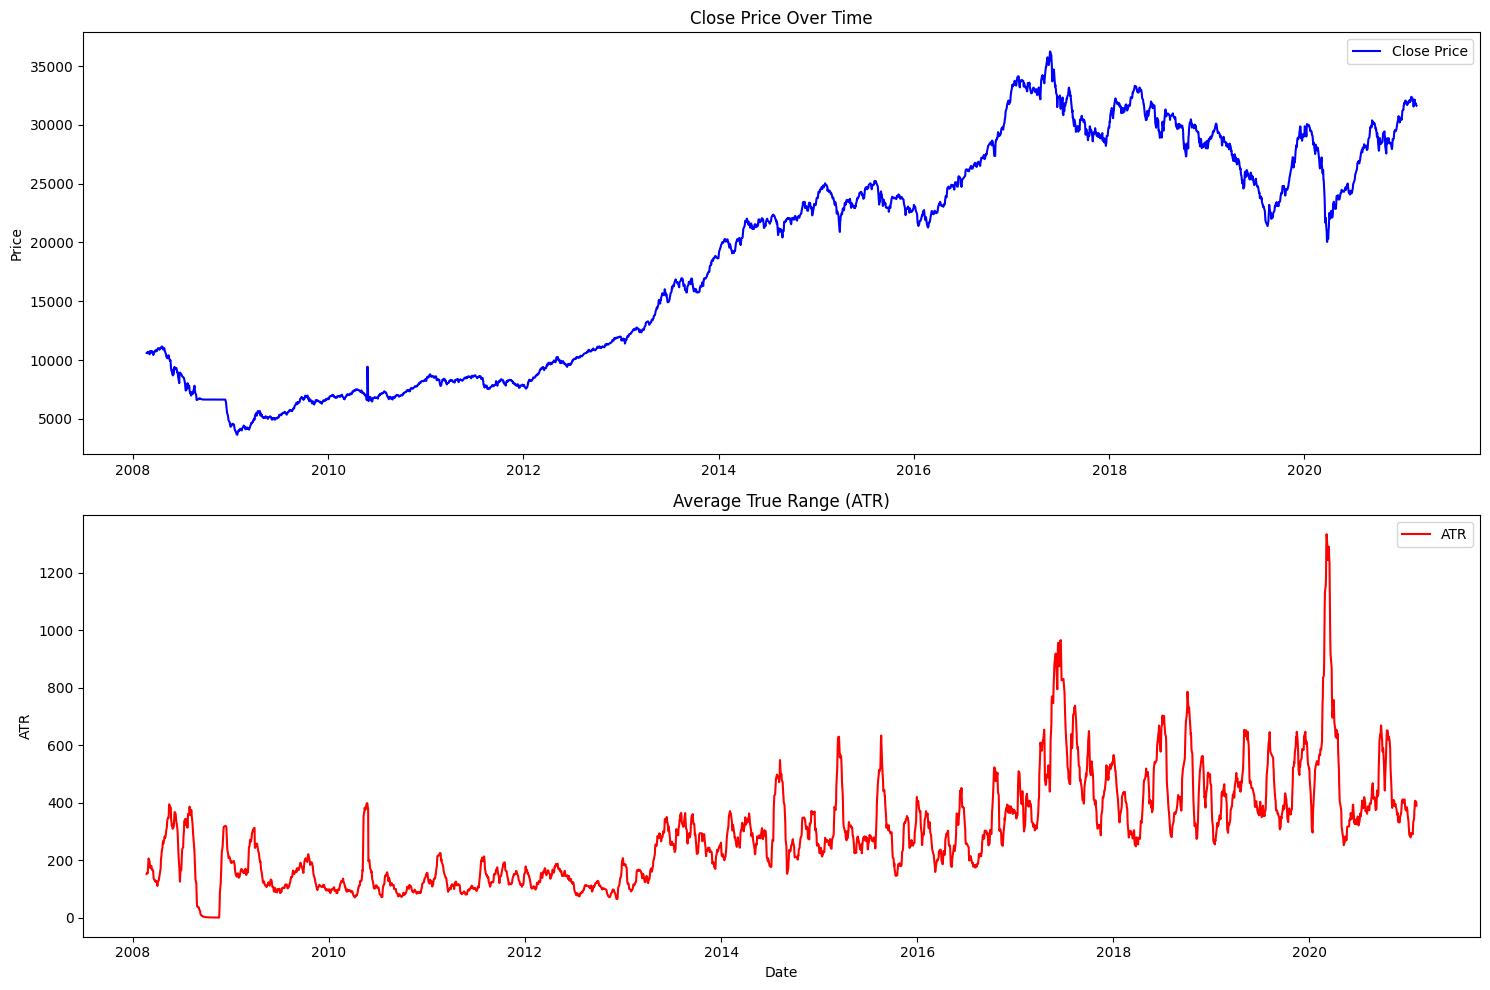

In [25]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(15, 10))

# Plot Close Price

axis1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
axis1.set_title("Close Price Over Time")
axis1.set_ylabel("Price")
axis1.legend()

# Plot ATR

axis2.plot(df['Date'], df['ATR'], color='red', label='ATR')
axis2.set_title("Average True Range (ATR)")
axis2.set_ylabel("ATR")
axis2.set_xlabel("Date")
axis2.legend()

plt.tight_layout()
plt.show()

Value at Risk (VaR)

In [26]:
df['Daily_Return'] = df['Close'].pct_change()

confidence_level = 0.95

VaR_95 = df['Daily_Return'].quantile(1-confidence_level)

print(f"Value at Risk (Var) at 95% confidence level: {VaR_95:.4f}")

Value at Risk (Var) at 95% confidence level: -0.0162


Sharpe Ratio

In [27]:
# Set risk free rate

risk_free_rate = 0

Avgerage_Return = df['Daily_Return'].mean()
Std_Dev_Average = df['Daily_Return'].std()

# Calculate the Sharpe Ratio

Sharpe_Ratio = (Avgerage_Return - risk_free_rate) / Std_Dev_Average
print(f"The Sharpe Ratio is:{Sharpe_Ratio:.4f}")

The Sharpe Ratio is:-0.0170


Market Sentiment Analysis

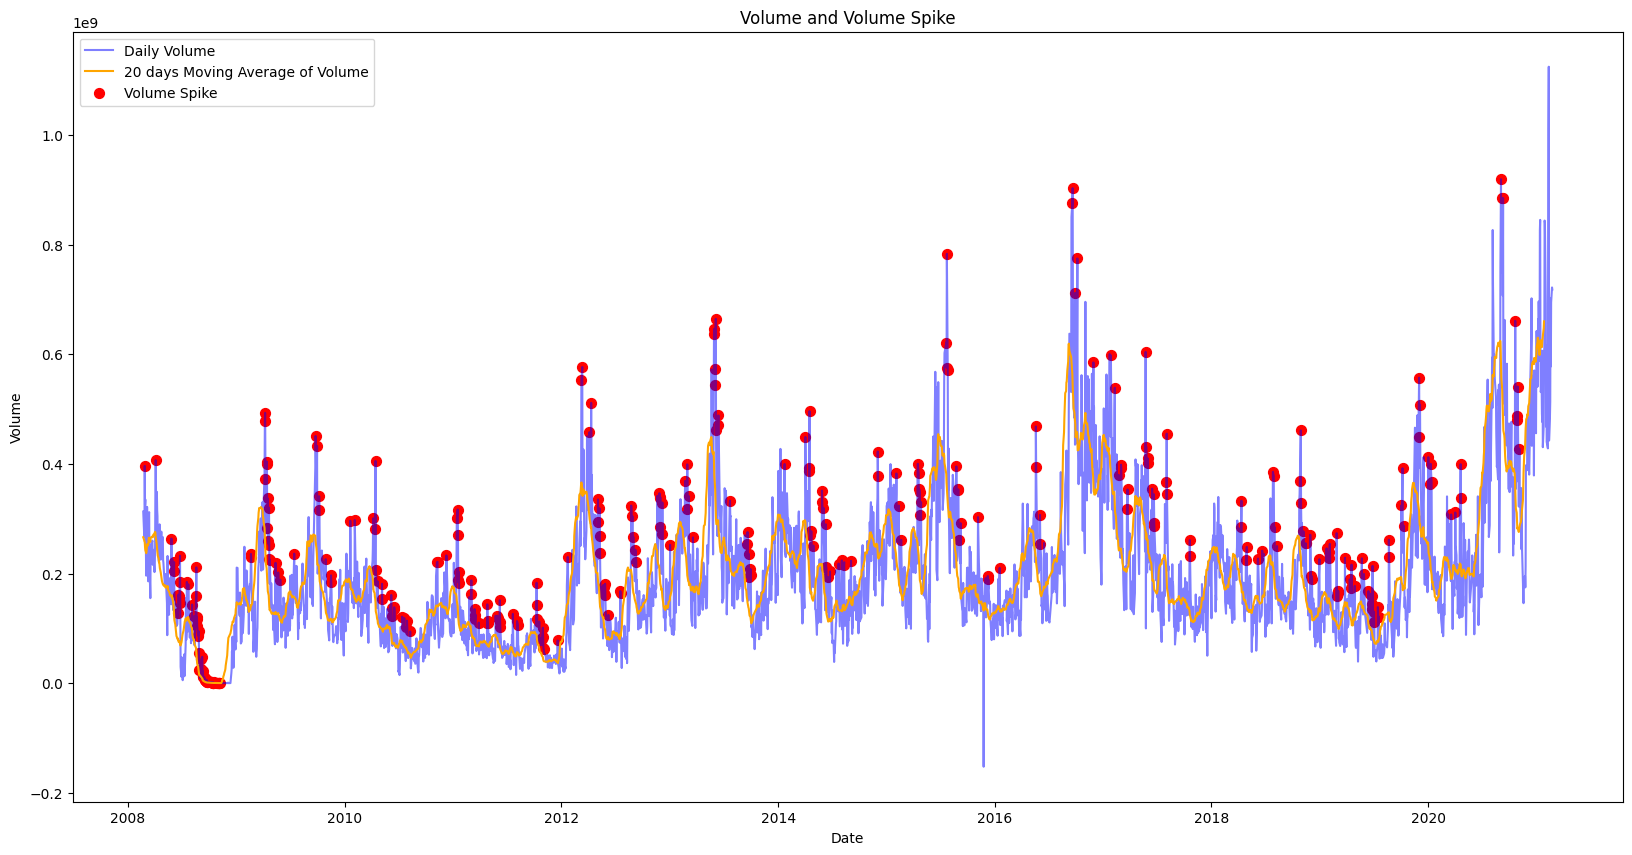

In [28]:
# Calculate the Moving Average of Volume

df['Volume_MA'] = df['Volume'].rolling(window=20).mean()

threshold = 1.5
df['Volume_Spike'] = df['Volume'] > (threshold * df['Volume_MA'])

# Plotting Volume and highlighting the spikes

plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Volume'], label='Daily Volume',  color='blue', alpha=0.5)
plt.plot(df['Date'], df['Volume_MA'], label='20 days Moving Average of Volume', color='orange')

plt.scatter(df[df['Volume_Spike']]['Date'], df[df['Volume_Spike']]['Volume'], label='Volume Spike', color='red', marker='o', s=50)
plt.title("Volume and Volume Spike")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

Backtesting Strategy Analysis

In [29]:
# Define buy condition based on RSI, Moving Average Crossover, and Volume Spike
df['Buy_Signal'] = (
    (df['RSI'] < 30) |  # Buy when RSI indicates oversold
    ((df['Short_SMA'] > df['Long_SMA']) & (df['Short_SMA'].shift(1) <= df['Long_SMA'].shift(1))) |  # Buy on SMA crossover
    (df['Volume_Spike'])  # Volume spike confirms interest
)

# Define sell condition
df['Sell_Signal'] = (
    (df['RSI'] > 70) |  # Sell when RSI indicates overbought
    ((df['Short_SMA'] < df['Long_SMA']) & (df['Short_SMA'].shift(1) >= df['Long_SMA'].shift(1)))  # Sell on SMA cross down
)

In [30]:
# Initialize a few variables
initial_cash = 100000  # starting cash in PKR
cash = initial_cash
position = 0  # No shares held at start
trade_log = []

for index, row in df.iterrows():
    if row['Buy_Signal'] and cash > 0:
        # Buy action
        position = cash / row['Close']  # number of shares
        cash = 0  # all cash is invested
        trade_log.append(('Buy', index, row['Date'], row['Close'], cash, position))
    
    elif row['Sell_Signal'] and position > 0:
        # Sell action
        cash = position * row['Close']  # liquidate the position
        position = 0
        trade_log.append(('Sell', index, row['Date'], row['Close'], cash, position))

# Final portfolio value
final_value = cash + (position * df['Close'].iloc[-1])  # account for any unsold position
return_percentage = ((final_value - initial_cash) / initial_cash) * 100

print(f"Backtesting completed. Final portfolio value: Rs{final_value:.2f}")
print(f"Total return: {return_percentage:.2f}%")

Backtesting completed. Final portfolio value: Rs313506.64
Total return: 213.51%


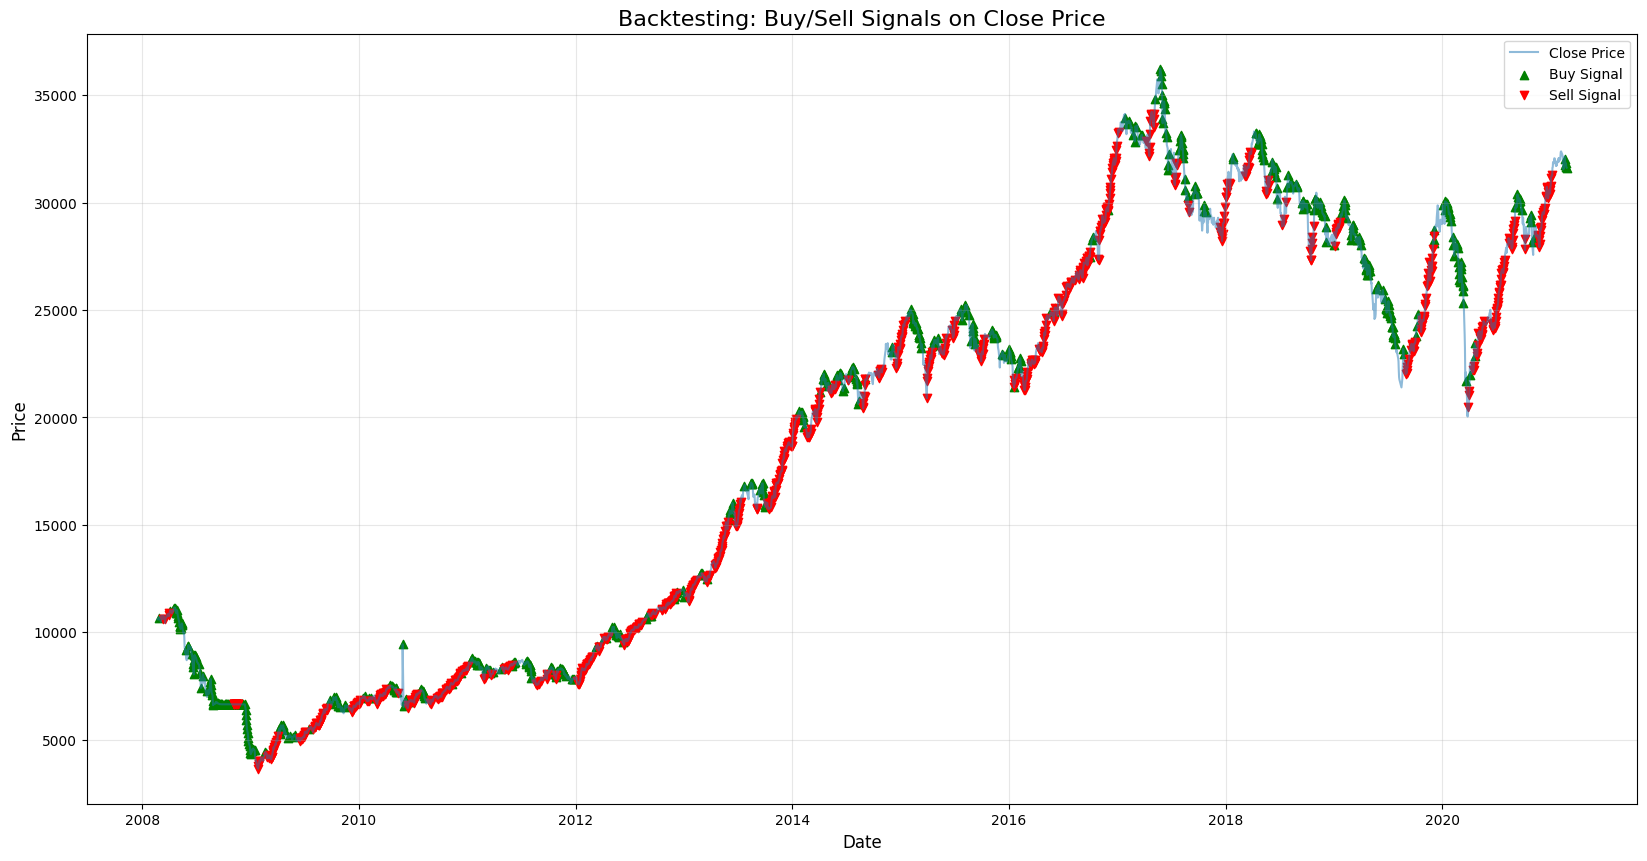

In [31]:
# Prepare the data for visualization

df['Portfolio_Value'] = cash + (position * df['Close'])  # Portfolio value at each step
buy_signals = df[df['Buy_Signal']]  # Filter rows where Buy_Signal is True
sell_signals = df[df['Sell_Signal']]  # Filter rows where Sell_Signal is True

# Plot the Close prices

plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Close'], label='Close Price', alpha=0.5)

# Plot the buy signals

plt.scatter(buy_signals['Date'], buy_signals['Close'], label='Buy Signal', marker='^', color='green', alpha=1)

# Plot the sell signals

plt.scatter(sell_signals['Date'], sell_signals['Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Backtesting: Buy/Sell Signals on Close Price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show()

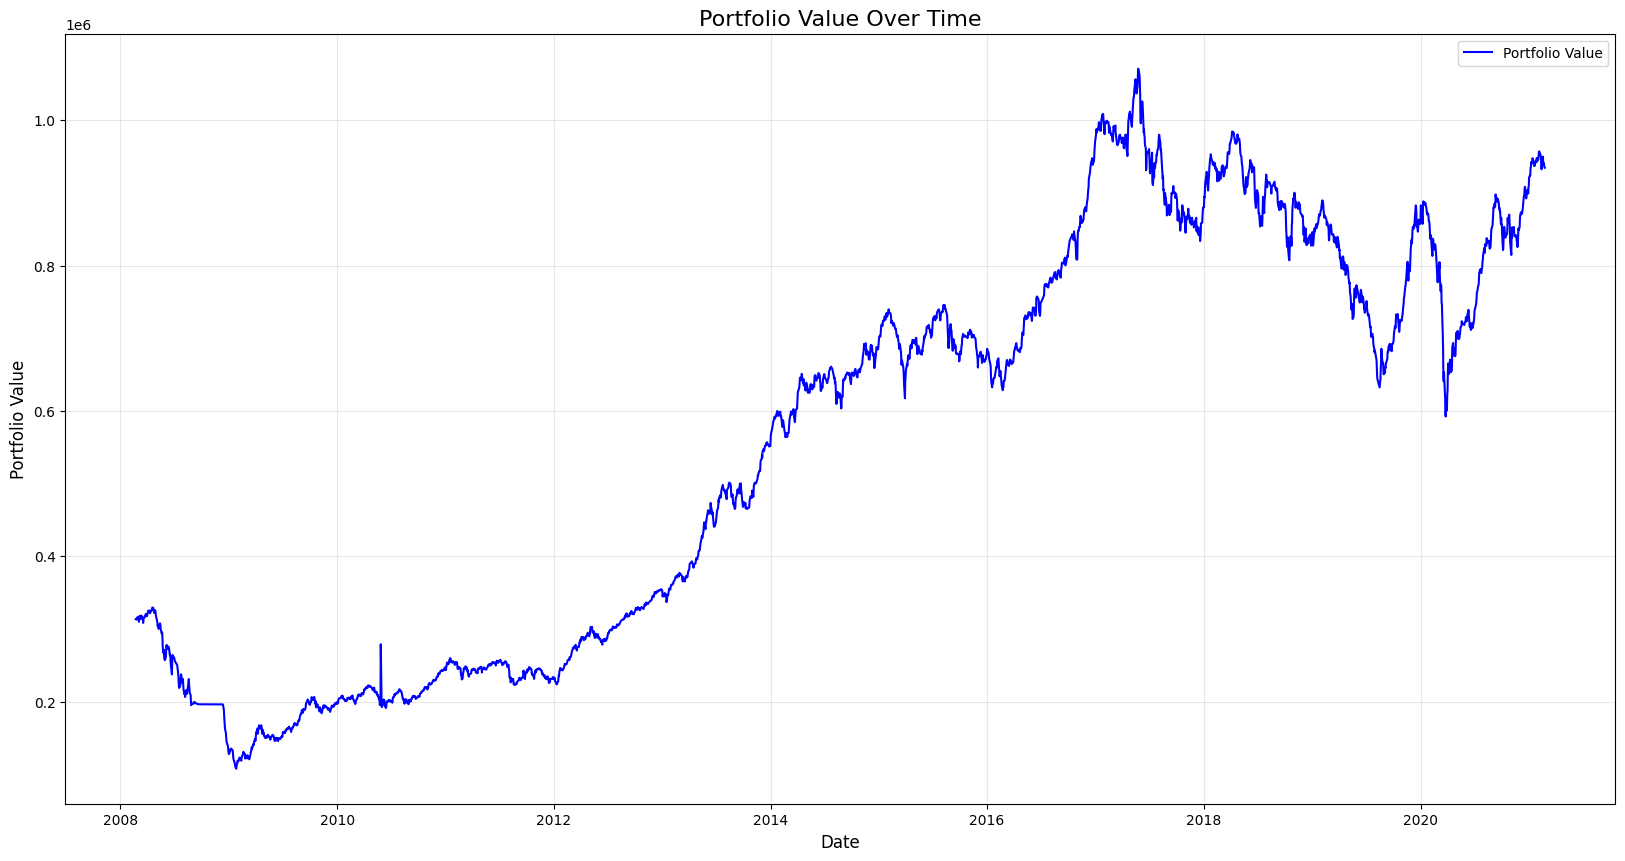

In [32]:
# Plot the portfolio value over time

plt.figure(figsize=(20, 10))
plt.plot(df['Date'], df['Portfolio_Value'], label='Portfolio Value', color='blue')

plt.title('Portfolio Value Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.show() 